In [ ]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 1. Load the Dataset

In [ ]:
# URL of the dataset
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"

# Column names
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
           'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Loading the dataset
df = pd.read_csv(data_url, delim_whitespace=True, names=columns)

# Displaying first few rows
df.head()

/tmp/ipython-input-3778328636.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_url, delim_whitespace=True, names=columns)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## EDA

In [ ]:
# Total rows
print("Total rows: ", len(df))

# Total columns
print("Total columns: ", len(df.columns))

# Checking the missing values
print("\nMissing values in each column:\n", df.isnull().sum())

# Checking column types
print("\nColumn data types:\n")
print(df.info())

Total rows:  506
Total columns:  14

Missing values in each column:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Column data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dt

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


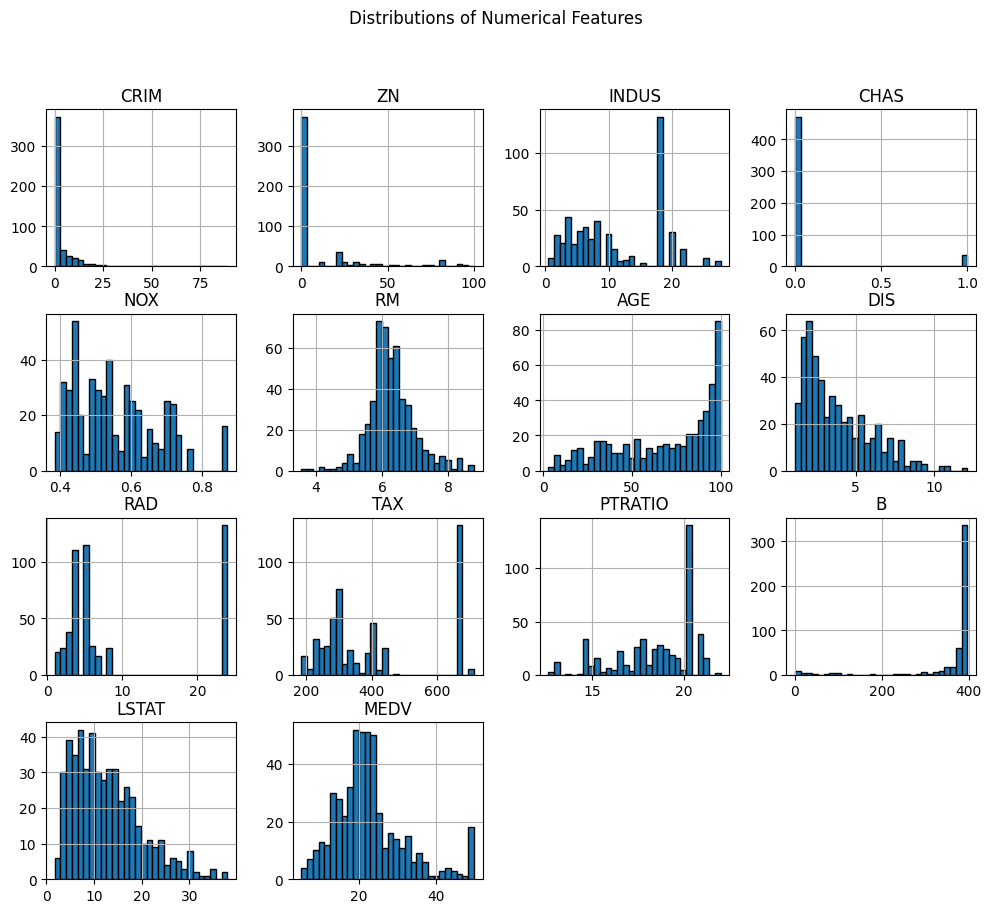

In [ ]:
# Distribution of numerical columns
df.hist(figsize=(12,10), bins=30, edgecolor='black')
plt.suptitle("Distributions of Numerical Features")
plt.show()

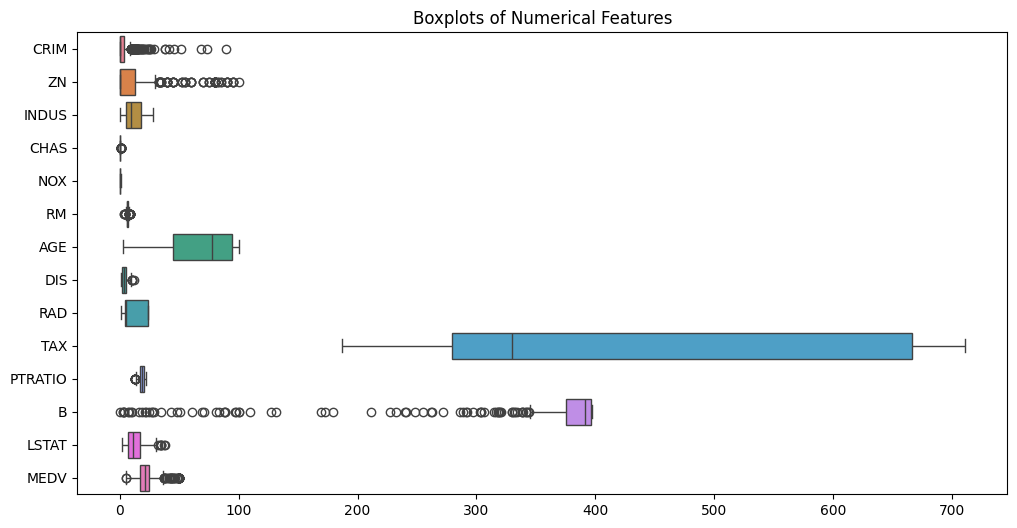

In [ ]:
# Boxplots for outlier detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplots of Numerical Features")
plt.show()

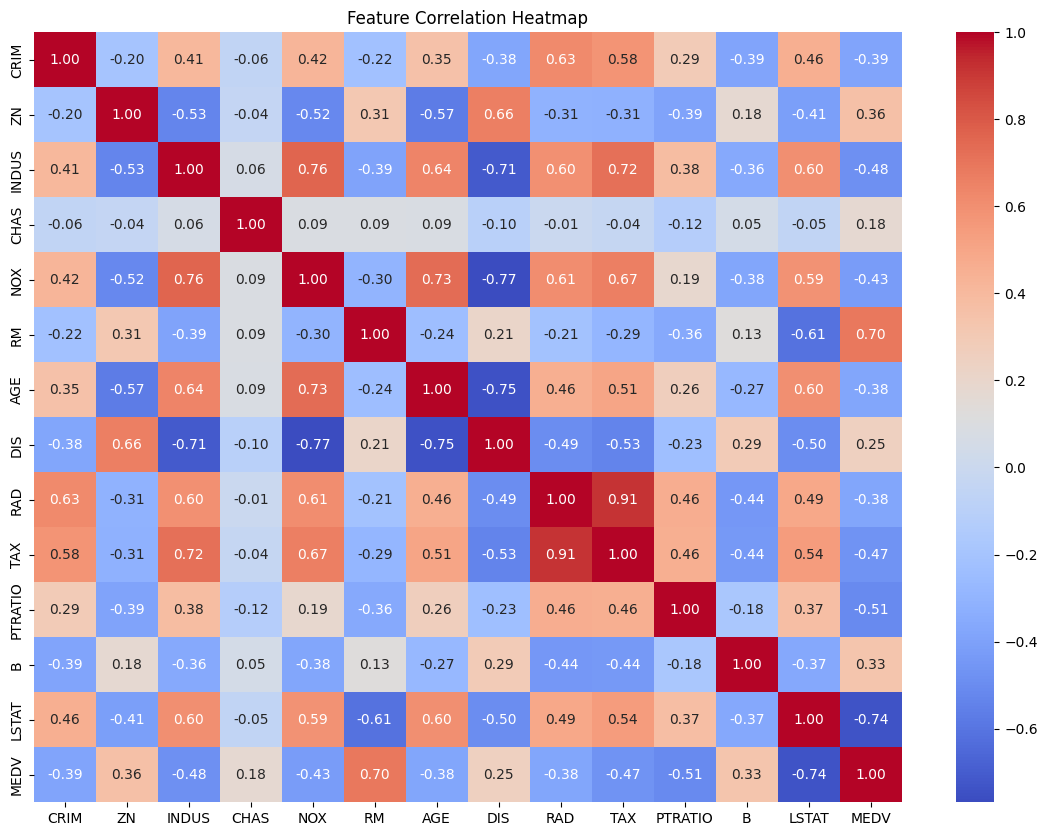

In [ ]:
# Correlation Heatmap

plt.figure(figsize=(14,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Function to remove outliers from all numeric columns using IQR
def remove_outliers_all(df):
    df_clean = df.copy()
    for col in df_clean.columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean


# Remove outliers from all columns
df = remove_outliers_all(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     214 non-null    float64
 1   ZN       214 non-null    float64
 2   INDUS    214 non-null    float64
 3   CHAS     214 non-null    int64  
 4   NOX      214 non-null    float64
 5   RM       214 non-null    float64
 6   AGE      214 non-null    float64
 7   DIS      214 non-null    float64
 8   RAD      214 non-null    int64  
 9   TAX      214 non-null    float64
 10  PTRATIO  214 non-null    float64
 11  B        214 non-null    float64
 12  LSTAT    214 non-null    float64
 13  MEDV     214 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 25.1 KB


In [ ]:
# Compute correlation with target
corr_with_target = df.corr()['MEDV'].sort_values(ascending=False)
print("Correlation with MEDV:\n", corr_with_target)

Correlation with MEDV:
 MEDV       1.000000
RM         0.684333
ZN         0.307642
DIS        0.154968
RAD        0.120954
B         -0.007701
TAX       -0.267205
CRIM      -0.272352
INDUS     -0.346934
NOX       -0.392227
AGE       -0.413385
PTRATIO   -0.430696
LSTAT     -0.661716
CHAS            NaN
Name: MEDV, dtype: float64


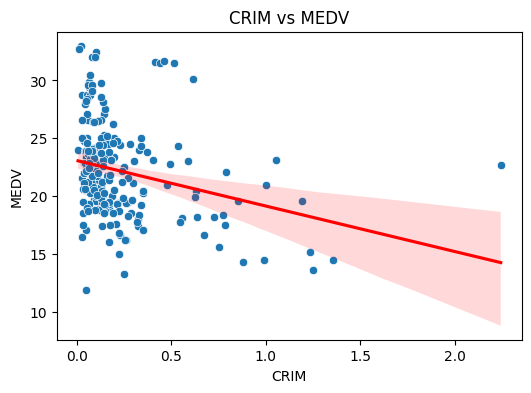

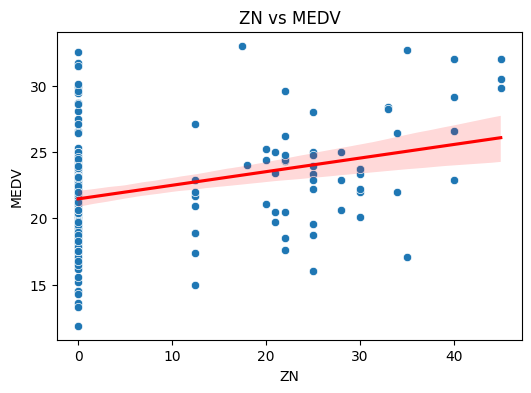

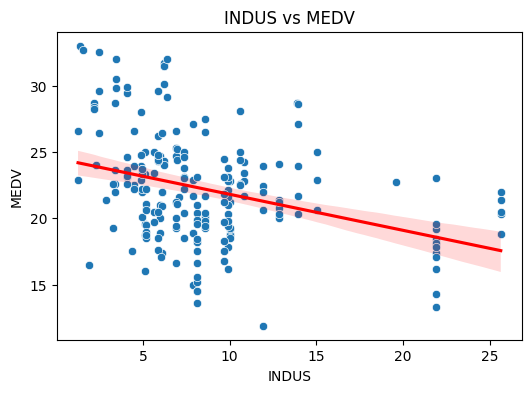

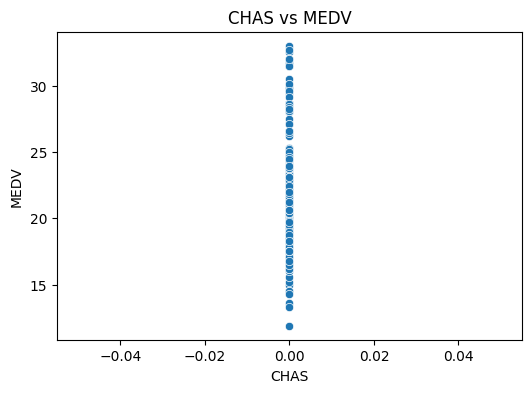

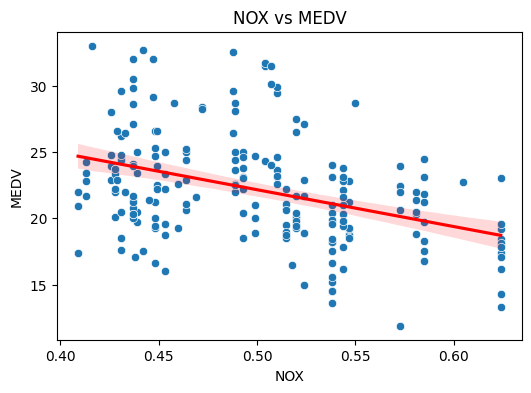

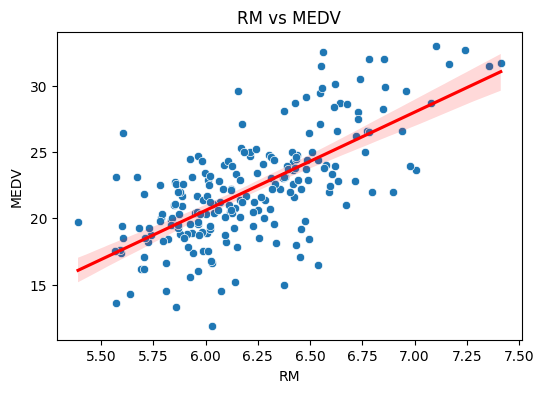

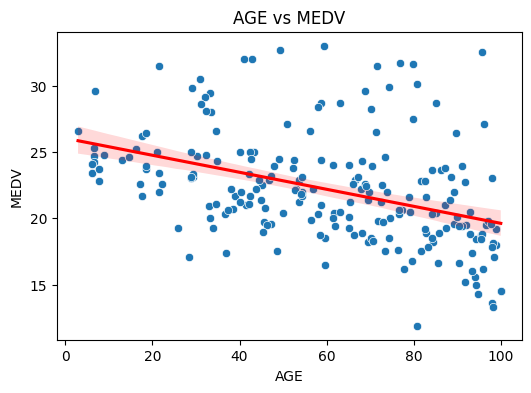

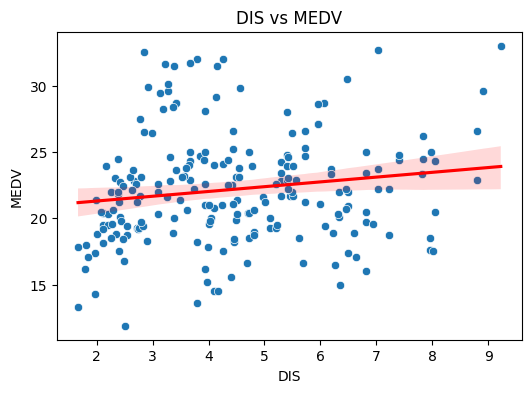

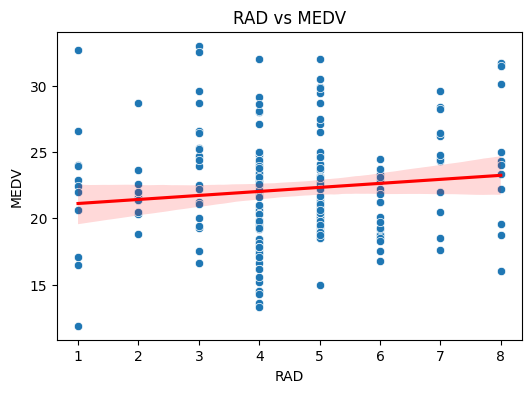

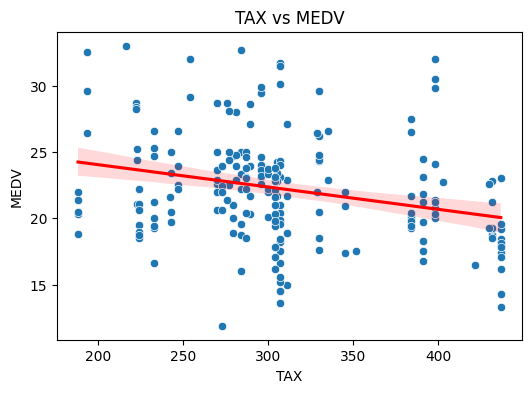

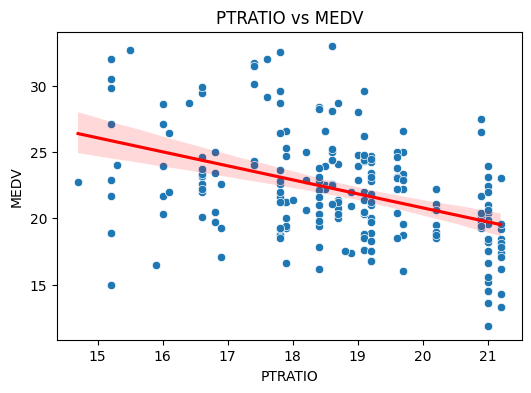

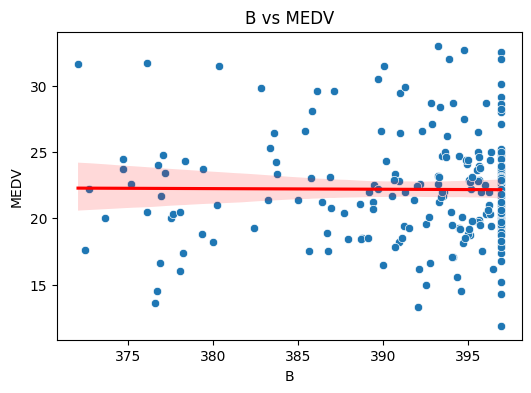

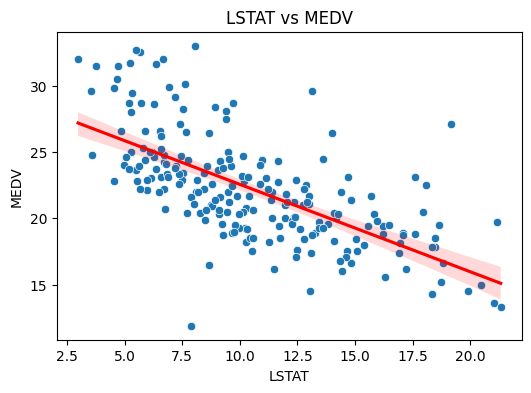

In [ ]:
# Scatterplots of each feature vs target (MEDV)
for col in df.drop(columns=['MEDV']).columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['MEDV'])
    sns.regplot(x=df[col], y=df['MEDV'], scatter=False, color="red")
    plt.title(f"{col} vs MEDV")
    plt.xlabel(col)
    plt.ylabel("MEDV")
    plt.show()

## 2. Split the Dataset

In [ ]:
# Select top features correlated with MEDV
selected_features = corr_with_target[abs(corr_with_target) > 0.1].index.tolist()
selected_features.remove('MEDV')  # Remove target itself


# selected_features
X_selected = df[selected_features]
y_selected = df['MEDV']


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

## 3. Train Models

In [ ]:
# Initialize models
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)


# Fit models
lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

## 4. Evaluate Models

In [ ]:
# Function to calculate metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, rmse, r2, mae


# Evaluate each model
results = {
    "Linear Regression": evaluate_model(lin_reg, X_test, y_test),
    "Ridge Regression": evaluate_model(ridge_reg, X_test, y_test),
    "Lasso Regression": evaluate_model(lasso_reg, X_test, y_test)
}

## 5. Compare Results

In [ ]:
# Create comparison table
results_df = pd.DataFrame(results, index=["MSE", "RMSE", "R²", "MAE"]).T
results_df

,MSE,RMSE,R²,MAE
Linear Regression,3.361047,1.833316,0.693956,1.360341
Ridge Regression,3.253319,1.803696,0.703765,1.329043
Lasso Regression,3.159980,1.777633,0.712264,1.322882


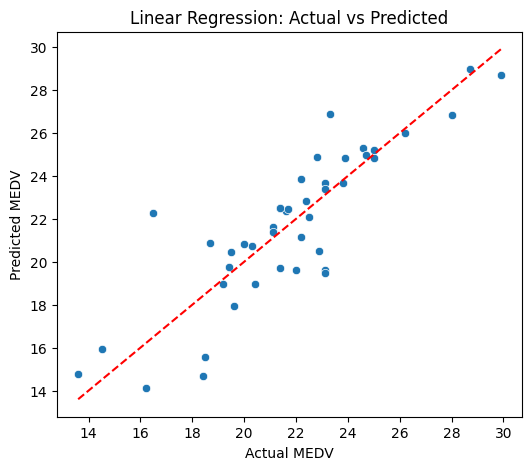

In [ ]:
# Linear Regression Plot

plt.figure(figsize=(6,5))
y_pred_lin = lin_reg.predict(X_test)
sns.scatterplot(x=y_test, y=y_pred_lin)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

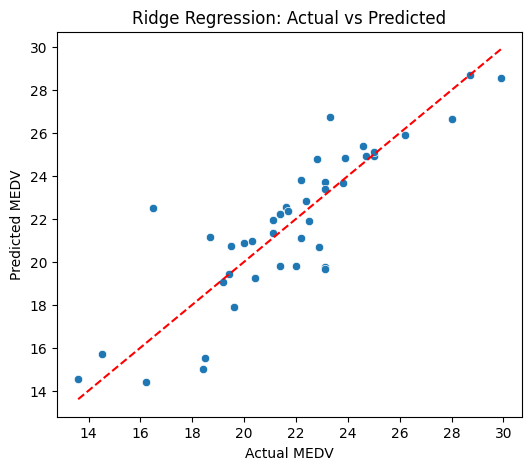

In [ ]:
# Ridge Regression Plot

plt.figure(figsize=(6,5))
y_pred_ridge = ridge_reg.predict(X_test)
sns.scatterplot(x=y_test, y=y_pred_ridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Ridge Regression: Actual vs Predicted")
plt.show()

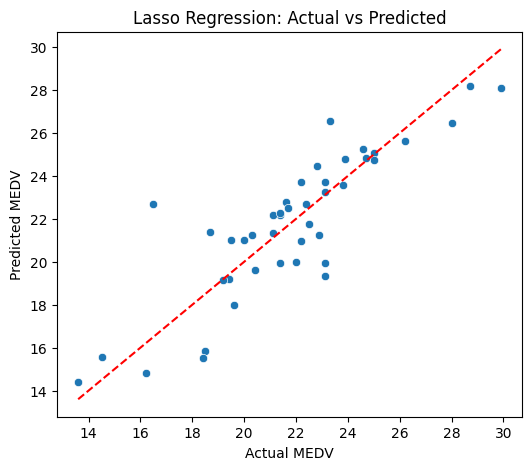

In [ ]:
# Lasso Regression Plot

plt.figure(figsize=(6,5))
y_pred_lasso = lasso_reg.predict(X_test)
sns.scatterplot(x=y_test, y=y_pred_lasso)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Lasso Regression: Actual vs Predicted")
plt.show()